In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('Ichimoku cloud extended signals.xlsx')

print(df.head())

In [2]:
df.info()

In [4]:
# می توانیم مقادیر گمشده را با میانگین هر ستون پر کنیم
df = df.fillna(df.mean())
print(df)

In [5]:
df = df[df['Volume'] > 0]

print(df)
df.columns

In [6]:
# 4. نرمال سازی داده ها برای ویژگی های عددی
from sklearn.preprocessing import StandardScaler



scaler = StandardScaler()
num_cols = ['Low', 'High', 'Open', 'Close', 'Volume',
       'CCC (current candle color) ', 'candlestick body change',
       'Change: candlestick  body change(%) ', 'AV (Average Volume)  ',
       'AVG (Average Volume Growth) ', 'Season', 'Month', 'week',
       'ichimoku cloud-Conversion line t0', 'ichimoku cloud-Base line t0',
       'ichimoku cloud-Lagging Span t0', 'ICLS-25',
       'ichimoku cloud-Leading Span A t0', 'ichimoku cloud-Leading Span B t0',
       'ICLSA+25', 'ICLSB+25', 'CC0', 'CC-25', 'CC+25', 'CP0', 'CP-25',
       'CLvsBL0', 'CLvsBL-25', 'CLcrBL0', 'CLcrBL-25', 'BLCLD0 ', 'BLCLD-25',
       'AcrB0', 'AcrB+25', 'Lag-CT-25', 'Strong bearish/ Strong Bullish/ Non ',
       'CW0', 'CW-25', 'CW+25', 'CC-d0', 'CC-d-25', 'TD0-SASB', 'TD0-BLCL',
       'AC0', 'AC-25', 'AC+25', 'Slope0', 'Slope-25', 'Slope+25',
       'next day candlestick price', 'next day candlestick color']
df[num_cols] = scaler.fit_transform(df[num_cols])

print(df)

In [7]:
# 5. ایجاد هیپ مپ برای مشاهده همبستگی ها
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [8]:
# محاسبه همبستگی ستون "next day candlestick price" با سایر ستون ها
price_corr = df.corr()['next day candlestick price']

# مرتب سازی مقادیر همبستگی
print(price_corr.sort_values(ascending=False))

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# فرض کنید df از قبل بارگذاری شده و X و y به درستی تعریف شده اند
X = df.drop(['next day candlestick price', 'next day candlestick color', 'timestamp'], axis=1)
y = df['next day candlestick price']

# تقسیم داده ها به آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [10]:
#cnn model defining 
def create_cnn_model(input_shape):
    model = models.Sequential([
        layers.Conv1D(64, 3, activation='relu', input_shape=input_shape),
        layers.Conv1D(64, 3, activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model


In [11]:
# hybrid model
def create_hybrid_model(input_shape):
    model = models.Sequential([
        layers.Conv1D(64, 3, activation='relu', input_shape=input_shape),
        layers.Conv1D(64, 3, activation='relu'),
        layers.MaxPooling1D(2),
        layers.LSTM(64, return_sequences=True),
        layers.LSTM(64),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model


In [16]:

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape کردن داده ها برای هر مدل
X_train_cnn = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val_cnn = X_val.values.reshape((X_val.shape[0], X_val.shape[1], 1))

X_train_hybrid = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val_hybrid = X_val.values.reshape((X_val.shape[0], X_val.shape[1], 1))



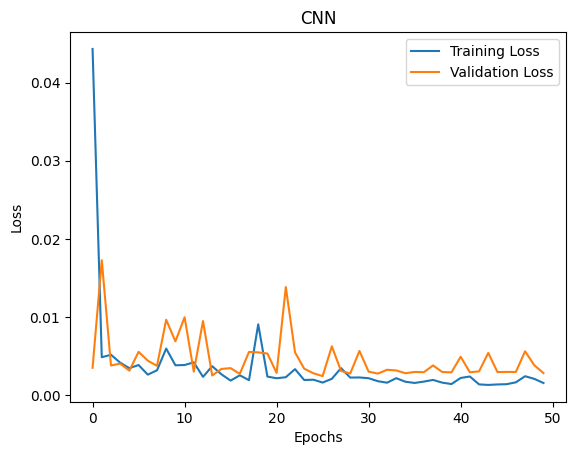

25/25 [==============================] - 0s 5ms/step
CNN - Training - MAE: 0.016892195555412458, MSE: 0.0010264009147865488, MAPE: 18.474216296317664%, R2: 0.998966416862393
CNN - Validation - MAE: 0.0254409350060669, MSE: 0.002826310476400105, MAPE: 20.39399505465574%, R2: 0.9972499812095903


In [17]:
# ارزیابی مدل ها
cnn_model = create_cnn_model((X_train_cnn.shape[1], 1))
evaluate_model('CNN', cnn_model, X_train_cnn, y_train, X_val_cnn, y_val)

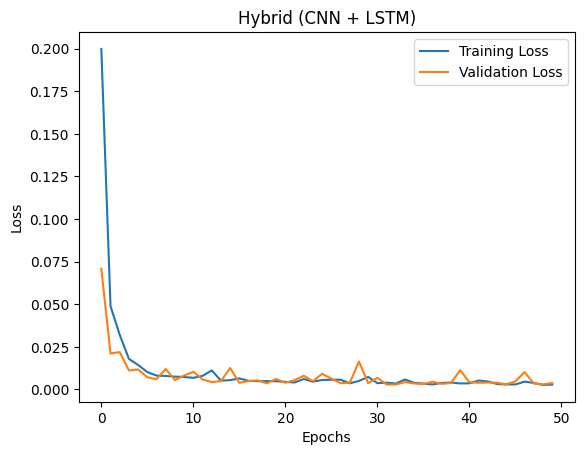

25/25 [==============================] - 0s 15ms/step
Hybrid (CNN + LSTM) - Training - MAE: 0.03327064114618501, MSE: 0.002579013093939106, MAPE: 31.00181748544188%, R2: 0.9974029403061108
Hybrid (CNN + LSTM) - Validation - MAE: 0.038294190271445386, MSE: 0.003714060432759391, MAPE: 25.92276830708835%, R2: 0.9963861946293265


In [19]:

hybrid_model = create_hybrid_model((X_train_hybrid.shape[1], 1))
evaluate_model('Hybrid (CNN + LSTM)', hybrid_model, X_train_hybrid, y_train, X_val_hybrid, y_val)


In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor  # اگر نصب شده باشد
from lightgbm import LGBMRegressor  # اگر نصب شده باشد
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# فرض کنید df از قبل بارگذاری شده و X و y به درستی تعریف شده اند
X = df.drop(['next day candlestick price', 'next day candlestick color', 'timestamp'], axis=1)
y = df['next day candlestick price']

# تقسیم داده ها به آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


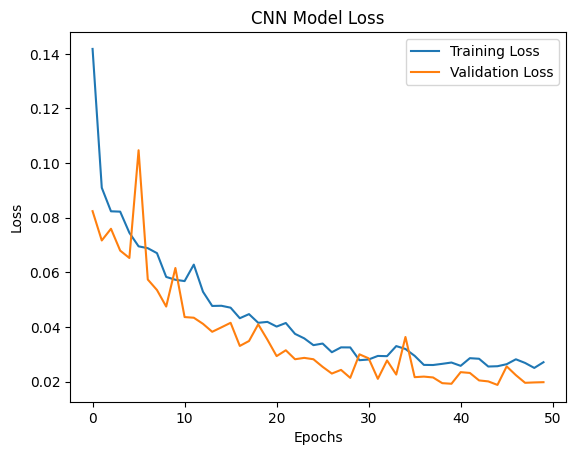

25/25 [==============================] - 1s 26ms/step
Transformer Model - Training - MAE: 0.09063705875527278, MSE: 0.022726432888916324, MAPE: 98.1446473699066%, R2: 0.9771145392862136
Transformer Model - Validation - MAE: 0.09035565788789883, MSE: 0.0197617408149667, MAPE: 58.52060002548512%, R2: 0.9807716954573283


In [25]:
# Transformer Model
def create_transformer_model(input_shape):
    inputs = layers.Input(shape=input_shape)

    # Embedding for transformer (not typical for numeric time series, but added for structural similarity)
    x = layers.Dense(64)(inputs)

    # Transformer Encoder Layer
    transformer_layer = layers.MultiHeadAttention(num_heads=4, key_dim=64)(x, x)
    transformer_layer = layers.LayerNormalization()(transformer_layer + x)

    # Fully connected layers
    x = layers.GlobalAveragePooling1D()(transformer_layer)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(1)(x)

    model = models.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mse')
    return model

# Transforming input data for transformer
X_train_transformer = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val_transformer = X_val.values.reshape((X_val.shape[0], X_val.shape[1], 1))

# Creating and evaluating transformer model
transformer_model = create_transformer_model(X_train_transformer.shape[1:])
evaluate_model('Transformer Model', transformer_model, X_train_transformer, y_train, X_val_transformer, y_val)


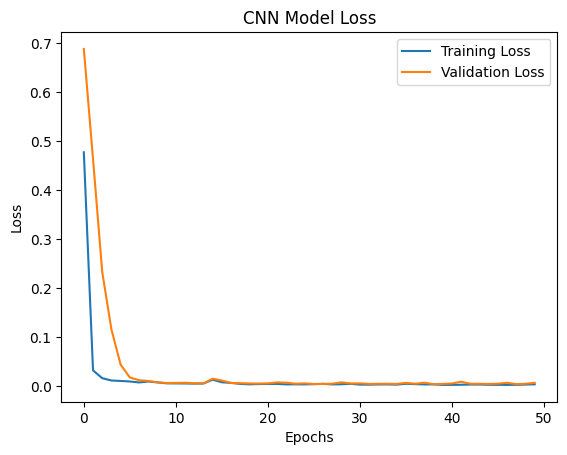

25/25 [==============================] - 0s 5ms/step
TCN Model - Training - MAE: 0.029155740337535763, MSE: 0.0032188762264143077, MAPE: 18.9399074218349%, R2: 0.996758599742326
TCN Model - Validation - MAE: 0.037925146391857276, MSE: 0.006299104017741066, MAPE: 26.650637618025737%, R2: 0.9938709301203181


In [26]:
# TCN Model
from tensorflow.keras.layers import Conv1D, BatchNormalization, ReLU

def create_tcn_model(input_shape):
    inputs = layers.Input(shape=input_shape)

    # First TCN layer
    x = Conv1D(64, 2, dilation_rate=1, padding='causal', activation='relu')(inputs)
    x = BatchNormalization()(x)

    # Second TCN layer with dilation
    x = Conv1D(64, 2, dilation_rate=2, padding='causal', activation='relu')(x)
    x = BatchNormalization()(x)

    # Flatten and Dense layers
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(1)(x)

    model = models.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mse')
    return model

# Reshaping input data for TCN
X_train_tcn = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val_tcn = X_val.values.reshape((X_val.shape[0], X_val.shape[1], 1))

# Creating and evaluating TCN model
tcn_model = create_tcn_model(X_train_tcn.shape[1:])
evaluate_model('TCN Model', tcn_model, X_train_tcn, y_train, X_val_tcn, y_val)


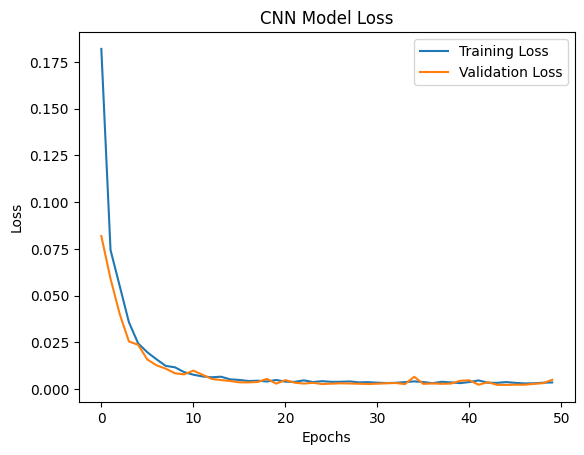

25/25 [==============================] - 1s 41ms/step
Attention LSTM Model - Training - MAE: 0.03921831192719266, MSE: 0.005022768089692884, MAPE: 56.670075232378515%, R2: 0.9949420851766321
Attention LSTM Model - Validation - MAE: 0.040038778775196994, MSE: 0.0048854158177321335, MAPE: 26.15209661218369%, R2: 0.9952464580908887


In [27]:
# Attention Mechanism for LSTM
class AttentionLayer(layers.Layer):
    def __init__(self):
        super(AttentionLayer, self).__init__()

    def build(self, input_shape):
        self.W = self.add_weight(name="attention_weight", shape=(input_shape[-1], 1), initializer="random_normal", trainable=True)
        self.b = self.add_weight(name="attention_bias", shape=(input_shape[1], 1), initializer="zeros", trainable=True)

    def call(self, x):
        e = tf.nn.tanh(tf.tensordot(x, self.W, axes=1) + self.b)
        alpha = tf.nn.softmax(e, axis=1)
        context_vector = alpha * x
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector

# Attention-LSTM Model
def create_attention_lstm_model(input_shape):
    inputs = layers.Input(shape=input_shape)

    # LSTM layers
    lstm_out = layers.LSTM(64, return_sequences=True)(inputs)
    lstm_out = layers.LSTM(64, return_sequences=True)(lstm_out)

    # Attention Layer
    attention_out = AttentionLayer()(lstm_out)

    # Fully connected layers
    x = layers.Dense(64, activation='relu')(attention_out)
    outputs = layers.Dense(1)(x)

    model = models.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mse')
    return model

# Reshaping input data for Attention-LSTM
X_train_lstm_att = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val_lstm_att = X_val.values.reshape((X_val.shape[0], X_val.shape[1], 1))

# Creating and evaluating Attention-LSTM model
attention_lstm_model = create_attention_lstm_model(X_train_lstm_att.shape[1:])
evaluate_model('Attention LSTM Model', attention_lstm_model, X_train_lstm_att, y_train, X_val_lstm_att, y_val)


In [ ]:
from tensorflow.keras import layers, models

# Define Autoencoder
def create_autoencoder(input_shape, h_z):
    input_layer = layers.Input(shape=input_shape)
    x = layers.Dense(128, activation="relu")(input_layer)
    x = layers.Dense(64, activation="relu")(x)
    x = layers.Dense(32, activation="relu")(x)
    z = layers.Dense(h_z, activation="relu", name="bottleneck")(x)  # Bottleneck layer with dimensionality h_z
    x = layers.Dense(32, activation="relu")(z)
    x = layers.Dense(64, activation="relu")(x)
    x = layers.Dense(128, activation="relu")(x)
    output_layer = layers.Dense(input_shape[0], activation="linear")(x)
    
    # Full autoencoder model
    autoencoder = models.Model(input_layer, output_layer)
    encoder = models.Model(input_layer, z)  # Encoder for dimensionality reduction
    autoencoder.compile(optimizer="adam", loss="mse")
    return autoencoder, encoder

In [ ]:
encoded_datasets = {}  # Dictionary to store datasets
for h_z in range(2, 11):  # H_Z values from 2 to 10
    autoencoder, encoder = create_autoencoder(X_train.shape[1:], h_z)
    autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_val, X_val), verbose=0)
    encoded_X_train = encoder.predict(X_train)
    encoded_X_val = encoder.predict(X_val)
    encoded_datasets[f"DB_Z_{h_z}"] = (encoded_X_train, encoded_X_val)


In [ ]:
import time
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize dictionary to store evaluation results
results = {
    'Model': [], 'Dataset': [],
    'Train MAE': [], 'Train MSE': [], 'Train R2': [], 'Train MAPE': [],
    'Test MAE': [], 'Test MSE': [], 'Test R2': [], 'Test MAPE': [],
    'Avg Prediction Time': []
}

# Function to train and evaluate model on encoded datasets
def evaluate_on_encoded_datasets(model_func, model_name):
    for h_z, (X_train_encoded, X_val_encoded) in encoded_datasets.items():
        # Initialize model and train
        model = model_func((h_z, 1))  # Adjust input shape
        start_time = time.time()
        model.fit(X_train_encoded, y_train_price, epochs=50, batch_size=32, validation_data=(X_val_encoded, y_val_price), verbose=0)
        
        # Calculate average prediction time
        prediction_time = (time.time() - start_time) / len(X_val_encoded)
        
        # Generate predictions
        train_preds = model.predict(X_train_encoded).ravel()
        val_preds = model.predict(X_val_encoded).ravel()
        
        # Calculate metrics for train and validation sets
        mae_train = mean_absolute_error(y_train_price, train_preds)
        mse_train = mean_squared_error(y_train_price, train_preds)
        r2_train = r2_score(y_train_price, train_preds)
        mape_train = np.mean(np.abs((y_train_price - train_preds) / y_train_price)) * 100
        mae_val = mean_absolute_error(y_val_price, val_preds)
        mse_val = mean_squared_error(y_val_price, val_preds)
        r2_val = r2_score(y_val_price, val_preds)
        mape_val = np.mean(np.abs((y_val_price - val_preds) / y_val_price)) * 100
        
        # Append results
        results['Model'].append(model_name)
        results['Dataset'].append(f"DB_Z_{h_z}")
        results['Train MAE'].append(mae_train)
        results['Train MSE'].append(mse_train)
        results['Train R2'].append(r2_train)
        results['Train MAPE'].append(mape_train)
        results['Test MAE'].append(mae_val)
        results['Test MSE'].append(mse_val)
        results['Test R2'].append(r2_val)
        results['Test MAPE'].append(mape_val)
        results['Avg Prediction Time'].append(prediction_time)


In [ ]:
evaluate_on_encoded_datasets(create_attention_lstm_model, "LSTM")
evaluate_on_encoded_datasets(create_tcn_model, "GRU")
evaluate_on_encoded_datasets(create_cnn_model, "CNN")
evaluate_on_encoded_datasets(create_hybrid_model, "Hybrid")
